In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("stock prices.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [9]:
print(df.columns)

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [15]:
df = df[df['symbol'] == 'AAPL']
df

,symbol,date,open,high,low,close,volume
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
484,AAPL,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870
967,AAPL,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151
1450,AAPL,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766
1933,AAPL,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685
...,...,...,...,...,...,...,...
494948,AAPL,2017-12-22,174.6800,175.4240,174.5000,175.0100,16349444
495453,AAPL,2017-12-26,170.8000,171.4700,169.6790,170.5700,33185536
495958,AAPL,2017-12-27,170.1000,170.7800,169.7100,170.6000,21498213
496463,AAPL,2017-12-28,171.0000,171.8500,170.4800,171.0800,16480187


In [17]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df

,symbol,date,open,high,low,close,volume
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
484,AAPL,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870
967,AAPL,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151
1450,AAPL,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766
1933,AAPL,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685
...,...,...,...,...,...,...,...
494948,AAPL,2017-12-22,174.6800,175.4240,174.5000,175.0100,16349444
495453,AAPL,2017-12-26,170.8000,171.4700,169.6790,170.5700,33185536
495958,AAPL,2017-12-27,170.1000,170.7800,169.7100,170.6000,21498213
496463,AAPL,2017-12-28,171.0000,171.8500,170.4800,171.0800,16480187


In [19]:
data = df['close'].values.reshape(-1, 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

timesteps = 20
X, y = create_sequences(data_scaled, timesteps)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [21]:
model = Sequential([
    LSTM(64, input_shape=(timesteps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/20


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1865 
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090
Epoch 16/20
25/25 ━━━━━━━━━━━

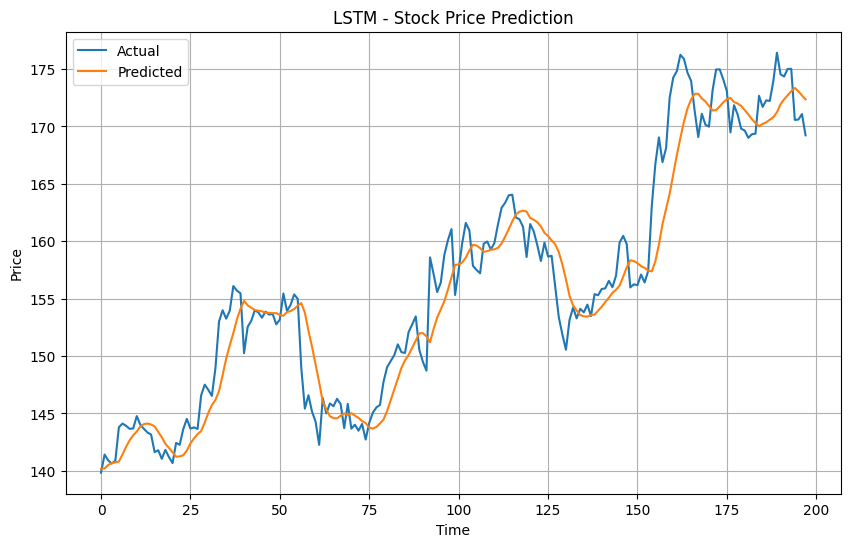

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("LSTM - Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
mse_lstm = mean_squared_error(y_test_inv, y_pred_inv)
print(f"LSTM Mean Squared Error: {mse_lstm:.4f}")

LSTM Mean Squared Error: 8.6869
